<a href="https://colab.research.google.com/github/RafsanJany-44/Research-NREM-REM/blob/main/Final_Result_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import pandas as pd

dataset=pd.read_csv("https://raw.githubusercontent.com/RafsanJany-44/Research-NREM-REM/main/dataset/REM_NREM.csv")


target="Sleep_Stage"

classes = np.array(sorted(list(set(dataset[target]))))


In [18]:
!pip install imbalanced-learn

from imblearn.over_sampling import SMOTE

def balance(X_temp, y_temp):
  smote = SMOTE()
  X_temp, y_temp= smote.fit_resample(X_temp, y_temp)

  return pd.concat([pd.DataFrame(X_temp), pd.DataFrame(y_temp)], axis=1)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:


print(dataset["Sleep_Stage"].value_counts())

NREM    72631
REM     16465
Name: Sleep_Stage, dtype: int64


In [20]:
dataset.head()

,Sleep_Stage,MeanP_Alpha_F4,MedianF_Alpha_F4,MeanF_Alpha_F4,Spectral Edge_Alpha_F4,PeakF_Alpha_F4,MeanP_Beta_F4,MedianF_Beta_F4,MeanF_Beta_F4,Spectral Edge_Beta_F4,...,MeanP_Delta_O2,MedianF_Delta_O2,MeanF_Delta_O2,Spectral Edge_Delta_O2,PeakF_Delta_O2,MeanP_Gamma_O2,MedianF_Gamma_O2,MeanF_Gamma_O2,Spectral Edge_Gamma_O2,PeakF_Gamma_O2
0,NREM,0.00034,10.11512,17.85756,17.48293,10.24000,0.00047,17.73268,25.35024,27.47317,...,0.00112,0.74927,6.36878,2.87220,0.62439,0.000076,32.71805,43.83220,49.95122,49.95122
1,NREM,0.00035,10.73951,17.60780,17.10829,9.11610,0.00048,16.85854,25.22537,26.97366,...,0.00070,0.99902,6.86829,3.62146,0.74927,0.000072,32.09366,44.33171,49.95122,49.95122
2,NREM,0.00035,9.36585,17.60780,16.98341,9.24098,0.00042,17.35805,26.09951,28.47220,...,0.00077,1.49854,6.49366,4.12098,0.74927,0.000069,33.09268,43.95707,49.95122,49.95122
3,NREM,0.00050,10.36488,16.60878,15.85951,7.99220,0.00053,15.48488,24.10146,25.72488,...,0.00130,1.87317,6.11902,3.74634,0.37463,0.000070,31.59415,42.83317,49.95122,49.95122
4,NREM,0.00072,9.36585,15.98439,15.48488,7.99220,0.00067,15.11024,22.22829,23.22732,...,0.00123,1.49854,6.61854,3.74634,0.74927,0.000060,29.47122,45.08098,49.95122,49.95122


In [21]:
set(list(dataset[target]))

{'NREM', 'REM'}

In [22]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
dataset[target]=encoder.fit_transform(dataset[target])

In [23]:

set(list(dataset[target]))

{0, 1}

In [24]:
X = dataset.loc[:, dataset.columns!=target]
y = dataset[target]

In [25]:
#Splitting dataset into training and testing dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [26]:
print(y_test.value_counts())

0    14460
1     3360
Name: Sleep_Stage, dtype: int64


In [27]:
from sklearn.ensemble import RandomForestClassifier
rf_depth = RandomForestClassifier(max_depth=28,random_state=0)
rf_depth.fit(X_train, y_train)
y_pred=rf_depth.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

[[14150   310]
 [  910  2450]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     14460
           1       0.89      0.73      0.80      3360

    accuracy                           0.93     17820
   macro avg       0.91      0.85      0.88     17820
weighted avg       0.93      0.93      0.93     17820

Accurecy:  0.9315375982042648


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


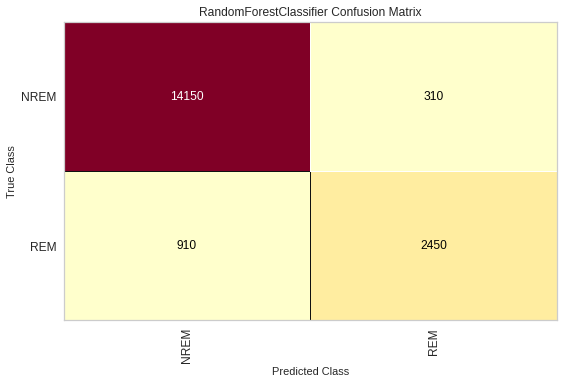

In [28]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(rf_depth, classes=classes)

cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

In [29]:
new_dataset=balance(X_test,y_test)

X_test = new_dataset.loc[:, new_dataset.columns!=target]
y_test = new_dataset[target]

In [30]:
new_dataset.shape

(28920, 76)

In [31]:
print(y_test.value_counts())

0    14460
1    14460
Name: Sleep_Stage, dtype: int64


In [32]:
y_pred=rf_depth.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

[[14150   310]
 [ 3689 10771]]
              precision    recall  f1-score   support

           0       0.79      0.98      0.88     14460
           1       0.97      0.74      0.84     14460

    accuracy                           0.86     28920
   macro avg       0.88      0.86      0.86     28920
weighted avg       0.88      0.86      0.86     28920

Accurecy:  0.8617219917012449


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


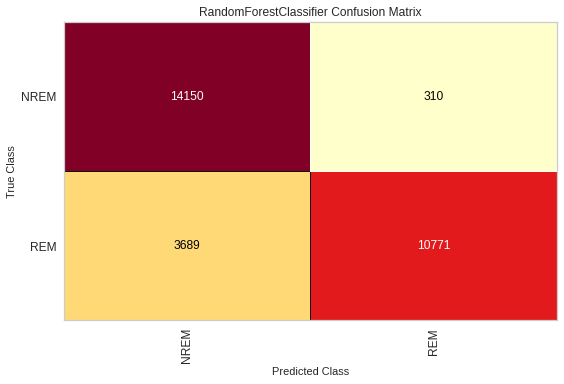

In [33]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(rf_depth, classes=classes)

cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()